# **Le TP doit être rendu avant 17h30 dans le dépôt Drive suivant :**  
## [Lien](https://drive.google.com/drive/folders/1Dyj_vSK5v7-BEHUeBVSD_rwPiT3RTrZl?usp=sharing)

# **Installation de Gensim et datasets**

Si vous n'avez pas encore installé Gensim, vous pouvez le faire en utilisant pip :

In [2]:
!pip install -q  gensim
!pip install -q datasets

In [3]:
# Importer la bibliothèque gensim pour vérifier sa version.
import gensim

# Afficher la version de spaCy installée.
print(f"Version de gensim installée : {gensim.__version__}")

# Vérifier si la version de gensim est compatible (par exemple >= 4.0).
version_spacy = tuple(map(int, gensim.__version__.split(".")))
if version_spacy >= (4, 0, 0):
    print("Version de gensim compatible ! ✅")
else:
    print("Version de gensim trop ancienne, veuillez mettre à jour à partir de 4.0.0. ❌")

Version de gensim installée : 4.3.3
Version de gensim compatible ! ✅


In [4]:
from gensim.models import KeyedVectors
import gensim.downloader

# Charger un modèle word2vec.
w2v_model = gensim.downloader.load('word2vec-google-news-300') # 12-13 minutes.

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
type(w2v_model)

gensim.models.keyedvectors.KeyedVectors

Le modèle récupéré est un objet de la classe`KeyedVectors`, une classe spécialement conçue pour stocker et manipuler les vecteurs de mots obtenus à partir de modèles comme Word2Vec, FastText, etc.

Voici quelques points clés à propos des `KeyedVectors` :

1. **Stockage des vecteurs de mots** : `KeyedVectors` stocke les vecteurs de mots dans une structure qui permet un accès rapide et efficace aux vecteurs par le biais de mots-clés.

2. **Opérations sur les mots** : Avec `KeyedVectors`, vous pouvez effectuer diverses opérations linguistiques et mathématiques, telles que trouver le mot le plus similaire, calculer la similarité entre deux mots, ou effectuer des analogies de mots (comme "roi" - "homme" + "femme" = "reine").

3. **Indépendance du modèle d'entraînement** : Une fois que les vecteurs sont extraits et stockés dans `KeyedVectors`, ils sont indépendants du modèle d'entraînement. Cela signifie que vous n'avez pas besoin du modèle complet pour manipuler ces vecteurs.

4. **Efficacité en mémoire et vitesse** : Les `KeyedVectors` sont conçus pour être efficaces en termes de mémoire et rapides en termes de récupération des vecteurs, ce qui est essentiel pour les applications en temps réel.

In [6]:
# Taille du vocabulaire.
len(w2v_model)

3000000

In [7]:
# Pour obtenir la représentation vectorielle du mot "étudiant".
w2v_model['student']

array([ 0.03686523,  0.0201416 ,  0.22167969,  0.15527344,  0.17871094,
        0.03149414,  0.31445312, -0.03369141,  0.15429688, -0.375     ,
        0.05102539, -0.13183594, -0.11962891, -0.13867188, -0.02026367,
        0.01318359, -0.06738281, -0.06591797, -0.02502441, -0.140625  ,
        0.02160645,  0.17382812, -0.00177765, -0.09179688, -0.09765625,
       -0.4921875 , -0.13671875, -0.00570679,  0.16992188,  0.10107422,
        0.09423828, -0.10986328, -0.08496094,  0.05419922, -0.06542969,
       -0.0168457 ,  0.11230469,  0.13964844, -0.08300781,  0.22265625,
       -0.23828125,  0.11767578, -0.04614258,  0.0859375 ,  0.17089844,
       -0.06884766,  0.04003906, -0.10351562,  0.15917969,  0.04956055,
       -0.10888672, -0.15039062,  0.01507568, -0.05419922,  0.25      ,
       -0.09521484, -0.11816406,  0.11132812,  0.20507812, -0.10009766,
        0.0168457 , -0.09521484, -0.00308228, -0.01348877,  0.09277344,
       -0.08447266,  0.08496094, -0.05541992,  0.15820312,  0.10

In [8]:
w2v_model.most_similar('student')

[('students', 0.7294867038726807),
 ('Student', 0.6706662774085999),
 ('teacher', 0.6301366090774536),
 ('stu_dent', 0.6240993142127991),
 ('faculty', 0.6087332963943481),
 ('school', 0.6055627465248108),
 ('undergraduate', 0.6020305752754211),
 ('university', 0.600540041923523),
 ('undergraduates', 0.5755698680877686),
 ('semester', 0.573759913444519)]

Pour le modèle, “roi” est à “reine”, ce que “homme” est à “femme”, il suffit d’opérer la même translation, le même glissement sémantique, pour passer de l’un à l’autre.

In [10]:
w2v_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=2)

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827)]

# **Exercice 1. Analyse sémantique et visualisation des catégories lexicales.**
- À partir des mots fournis dans les catégories (IT, politics, health), récupérez leurs vecteurs en utilisant Word2Vec. Si un mot n'existe pas dans le vocabulaire du modèle, ignorez-le

    Pour récupérer les vecteurs:
  ```python
    vecteur = w2v_model['mot_en_question']
  ```
- Appliquez une Analyse en Composantes Principales (ACP) pour réduire les vecteurs récupérés à 2 dimensions, puis affichez les mots dans un graphique 2D, en distinguant chaque catégorie par une couleur ou un style de point.
- Observez le graphique. Est-ce que les mots des différentes catégories sont bien séparés les uns des autres ?
  - Si oui, proposez une explication sur la manière dont le modèle capture les relations entre les mots des différentes catégories.
  - Sinon, identifiez les mots ou catégories problématiques et discutez pourquoi le modèle pourrait échouer à les séparer.


In [13]:
words = {
    'IT': ['computer', 'algorithm', 'linux', 'internet', 'wifi', 'system', 'hardware', 'software', 'programming', 'coding', 'data', 'engineering', 'network',
           'processor', 'developer', 'engineer', 'cryptography', 'web', 'java', 'javascript', 'python', 'binary', 'linux', 'assembler', 'web'],
    'politics': ['election', 'president', 'parliament', 'minister', 'scandal', 'election', 'democracy', 'constitution', 'legislation', 'country', 'vote', 'government', 'governor',
                 'senator', 'suffrage', 'parliamentary', 'law', 'republic', 'liberal', 'equality', 'civic', 'society', 'politics', 'law', 'politics'],
    'health': ['doctor', 'disease', 'cancer', 'flu', 'pain', 'hospital', 'treatment', 'medication', 'diagnosis', 'prognosis', 'injury', 'medical', 'therapy', 'medicine',
               'health', 'clinic', 'neurological', 'care', 'anatomy', 'immunology', 'surgery', 'surgeon', 'endocrine', 'trauma', 'pediatrics', 'dermatology', 'transplantation',
               'ophthalmology', 'orthopedics', 'urology', 'neurology', 'pediatrics']
}

In [11]:
vecteur = w2v_model['computer']
vecteur

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [21]:
for category in words:
    for word in words[category]:
      print(word)

computer
algorithm
linux
internet
wifi
system
hardware
software
programming
coding
data
engineering
network
processor
developer
engineer
cryptography
web
java
javascript
python
binary
linux
assembler
web
election
president
parliament
minister
scandal
election
democracy
constitution
legislation
country
vote
government
governor
senator
suffrage
parliamentary
law
republic
liberal
equality
civic
society
politics
law
politics
doctor
disease
cancer
flu
pain
hospital
treatment
medication
diagnosis
prognosis
injury
medical
therapy
medicine
health
clinic
neurological
care
anatomy
immunology
surgery
surgeon
endocrine
trauma
pediatrics
dermatology
transplantation
ophthalmology
orthopedics
urology
neurology
pediatrics


In [41]:
import numpy as np
def get_keywords_vectors(words):
  df = []
  categories = []
  for category in words:
    for word in words[category]:
      try:
        df.append(w2v_model[word])
        categories.append(category)
      except:
        pass
  return np.array(df), categories

In [42]:
df, categories = get_keywords_vectors(words)

In [24]:
df.shape

(82, 300)

In [27]:
np.sum([len(words[category]) for category in words])

82

✅✅✅ **Commentaire**

`df.shape` est égal au nombre de mots définis dans words : Nous avons donc pu récupérer tous les vecteurs de ces mots en utilisant Word2Vec

In [17]:
df

array([[-2.91748047e-02, -2.41699219e-02, -1.04980469e-01,
        -5.34667969e-02, -6.93359375e-02,  1.33789062e-01,
         1.45263672e-02,  1.12304688e-02, -4.98046875e-02,
         2.89306641e-02,  1.10473633e-02,  4.22363281e-02,
        -1.38671875e-01,  1.30859375e-01, -1.32812500e-01,
         1.64062500e-01,  1.67236328e-02,  1.33789062e-01,
        -1.75781250e-01,  2.20703125e-01, -1.28906250e-01,
         1.68945312e-01,  2.85156250e-01, -5.79833984e-03,
         2.36328125e-01,  1.45507812e-01, -6.59179688e-02,
         1.41601562e-01,  1.33789062e-01, -7.32421875e-02,
         1.34765625e-01,  3.85742188e-02, -1.04003906e-01,
        -1.29882812e-01, -6.88476562e-02, -5.58593750e-01,
        -8.25195312e-02, -6.95800781e-03,  2.12890625e-01,
         1.43554688e-01, -1.80664062e-01,  4.29687500e-02,
        -1.67968750e-01, -4.61425781e-02, -1.09375000e-01,
        -9.13085938e-02, -6.59179688e-02, -1.56250000e-01,
        -9.17968750e-02,  2.77343750e-01, -2.39257812e-0

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
model_pca = PCA(n_components=2)

In [31]:
model_pca.fit(df)

PCA(n_components=2)

In [32]:
pca_data = model_pca.transform(df)

In [39]:
words.keys()

dict_keys(['IT', 'politics', 'health'])

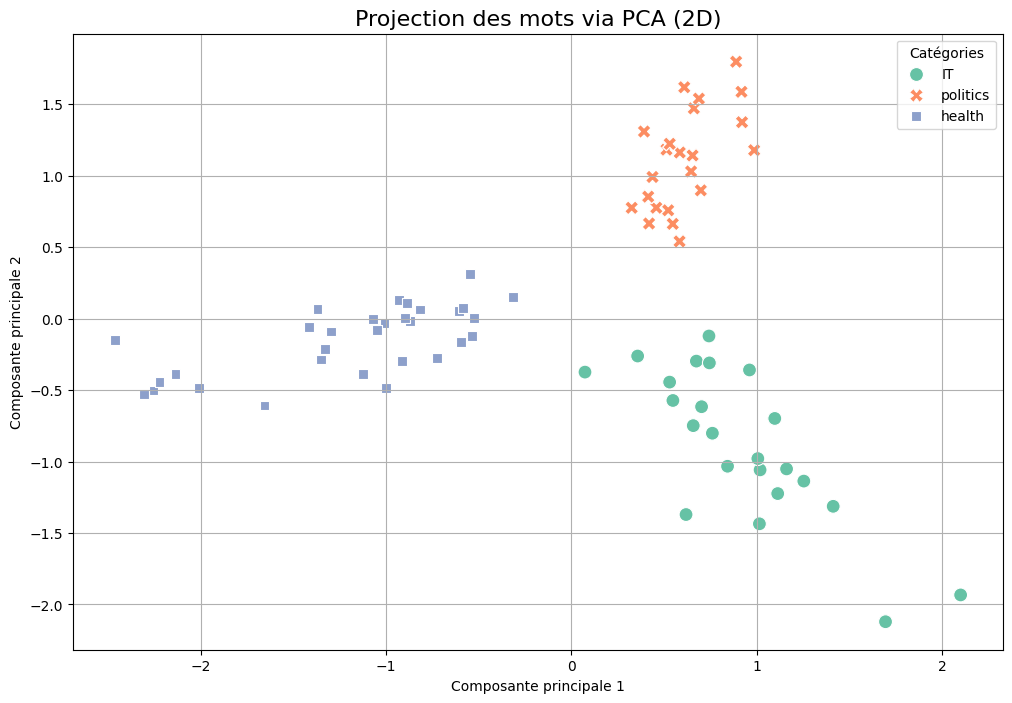

In [77]:
# Visualisation
plt.figure(figsize=(12, 8))
df = sns.scatterplot(
    x=pca_data[:, 0],
    y=pca_data[:, 1],
    hue=categories,
    palette='Set2',
    style=categories,
    s=100
)

plt.title("Projection des mots via PCA (2D)", fontsize=16)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title='Catégories')
plt.grid(True)
plt.show()

**Interprétation de résultat**

Les mots de nos différentes catégories sont bien séparés les uns des autres.


Cette réussite du modèle peut s'expliquer par plusieurs éléments
⬛ Proximité sémantique dans l'espace vectoriel :
   - Word2Vec est basé sur l'hypothèse distributionnelle. Et dans notre corpus, les mots qui apparaissent dans des contextes similaires ont des significations similaires.

⬛ Différenciation inter-catégories :
   - Les catégories comme IT, politics et health ont des contextes sémantiques distincts.
Donc, il n'y pas vraiment d'ambiguté entre les mots ( on pourrait avoir par exemple diagnostic en IT comme en Health).
Cette nette distinction entraîne une séparation naturelle dans l'espace vectoriel et améliore nettement la performance

⬛ Structure hiérarchique de Word2Vec :
   - Word2Vec utilise des mécanismes comme **Skip-Gram** ou **CBOW** pour apprendre les relations entre les mots. Il capture non seulement les relations de proximité directe (mots voisins) mais aussi des relations sémantiques plus abstraites. Cela permet de positionner les mots des catégories dans des régions distinctes de l'espace vectoriel.

⬛ Captures des relations implicites :
   - Le modèle apprend également des relations plus subtiles comme les analogies (par exemple, *king - man + woman = queen*). Cela aide à regrouper les mots liés dans une catégorie tout en les séparant des autres catégories.

⬛ Impact des corpus d'entraînement :
   - Puisque le modèle Word2Vec est préentraîné sur un corpus général comme Google News ou Wikipedia, il dispose d'une vaste connaissance des relations sémantiques entre les mots. Cela contribue à une meilleure séparation des catégories lexicales.



# **Exercice 2: Nettoyage du dataset BBC News**
1. Faites le nécessaire pour nettoyer la colonne `text` en créant une nouvelle colonne nommée `text_clean`.

> ⚠️ **Alerte :**  
> N'oubliez pas de tokeniser chaque document pour la suite des exercices.

In [79]:
# Importer les bibliothèques nécessaires.
import pandas as pd

# Télécharger le fichier directement depuis le lien.
url = "https://cifre.s3.eu-north-1.amazonaws.com/BBC_complete.csv"
df = pd.read_csv(url)

# Afficher les premières lignes du DataFrame.
df.head(3)

,Unnamed: 0,topic,text,topic_id
0,0,business,Quarterly profits at US media giant TimeWarne...,0
1,1,business,The dollar has hit its highest level against ...,0
2,2,business,The owners of embattled Russian oil giant Yuk...,0


In [47]:
df.shape

(2225, 4)

In [80]:
# Suppression de la colonne "unnamed"
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(2225, 3)

# Fonction de nettoyage du texte

In [51]:
# Import des bibliothèques nécessaires.
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

# Téléchargement les ressources NLTK nécessaires.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [81]:
# Chargement les stopwords en anglais.
stop_words = set(stopwords.words('english'))

# Fonction de nettoyage de base.
def text_cleaning(text):

    # Convertir en minuscules.
    text = text.lower()

    # Supprimer la ponctuation et les caractères spéciaux.
    text = re.sub(r'[^\w\s]', '', text)

    return text

In [82]:
# Fonction pour supprimer les stopwords.
def remove_stopwords(text):
    words2 = nltk.word_tokenize(text)
    words2 = [word for word in words2 if word not in stop_words]
    return ' '.join(words2)

# Application le nettoyage sur chaque document.
docs_cleaned = [text_cleaning(doc) for doc in df['text']]

# Appliquer la suppression des stopwords.
docs_no_stopwords = [remove_stopwords(doc) for doc in docs_cleaned]

In [83]:
df['text_clean'] = docs_no_stopwords

In [61]:
df.head()

,topic,text,topic_id,text_clean
0,business,Quarterly profits at US media giant TimeWarne...,0,quarterly profits us media giant timewarner ju...
1,business,The dollar has hit its highest level against ...,0,dollar hit highest level euro almost three mon...
2,business,The owners of embattled Russian oil giant Yuk...,0,owners embattled russian oil giant yukos ask b...
3,business,British Airways has blamed high fuel prices f...,0,british airways blamed high fuel prices 40 dro...
4,business,Shares in UK drinks and food firm Allied Dome...,0,shares uk drinks food firm allied domecq risen...


# Tokenisation

In [84]:
df['text_tokens'] = df['text_clean'].apply(word_tokenize)

In [85]:
df[['text_clean','text_tokens']].head()

,text_clean,text_tokens
0,quarterly profits us media giant timewarner ju...,"[quarterly, profits, us, media, giant, timewar..."
1,dollar hit highest level euro almost three mon...,"[dollar, hit, highest, level, euro, almost, th..."
2,owners embattled russian oil giant yukos ask b...,"[owners, embattled, russian, oil, giant, yukos..."
3,british airways blamed high fuel prices 40 dro...,"[british, airways, blamed, high, fuel, prices,..."
4,shares uk drinks food firm allied domecq risen...,"[shares, uk, drinks, food, firm, allied, domec..."


# **Vectorisation des documents**

Nous devons créer une fonction qui transforme une liste de $n$ documents en une matrice $X$ de taille $n \times d$, $d$ étant le nombre de dimensions du modèle d'embedding.

Étant donné un modèle d'embedding (par exemple, Word2Vec), chaque document est vectorisé de la manière suivante :
- Le document est tokenisé (divisé en mots) et nettoyé.
- Un vecteur de taille $d$ est calculé pour chaque mot.
- Les vecteurs des mots sont agregés ensemble pour former un seul vecteur de taille $d$.

In [63]:
import numpy as np


def vectorize_documents(tokenized_documents, w2v_model, aggregation_method='mean'):
    """
    Transforme une liste de documents tokenisés en une matrice de vecteurs en utilisant un modèle Word2Vec.
    Chaque document est représenté soit par la moyenne, soit par la somme des vecteurs de ses tokens.

    Args:
        tokenized_documents: Liste de documents tokenisés (chaque document est une liste de tokens).
        w2v_model: Modèle Word2Vec utilisé pour la vectorisation.
        aggregation_method: Méthode d'agrégation à utiliser, soit 'mean' pour la moyenne ou 'sum' pour la somme.

    Returns:
        np.array: Matrice de taille n x d, où n est le nombre de documents et d est le nombre de dimensions du modèle Word2Vec.
    """
    vectorized_docs = []

    for tokens in tokenized_documents:

        # Filtrage des tokens qui sont dans le modèle Word2Vec.
        word_vectors = [w2v_model[token] for token in tokens if token in w2v_model]

        # Moyenne ou somme des vecteurs des tokens pour obtenir le vecteur du document.
        if len(word_vectors) > 0:
            if aggregation_method == 'sum':
                doc_vector = np.sum(word_vectors, axis=0)
            else:
                doc_vector = np.mean(word_vectors, axis=0)  # Par défaut, on utilise la moyenne.
        else:
            # Gérer le cas où aucun token n'est dans le modèle.
            doc_vector = np.zeros(w2v_model.vector_size)

        vectorized_docs.append(doc_vector)

    return np.array(vectorized_docs)

# **Exercice 3 : Visualisation de documents par somme des tokens (vs. moyenne).**

- Visualisez des documents textuels (la colonne `text_clean`) avec une ACP en représentant les documents par la somme et par la moyenne en se basant sur la fonction `vectorize_documents`.

In [72]:
vectorized_docs_mean = vectorize_documents(df['text_tokens'], w2v_model, aggregation_method='mean')
vectorized_docs_sum = vectorize_documents(df['text_tokens'], w2v_model, aggregation_method='sum')


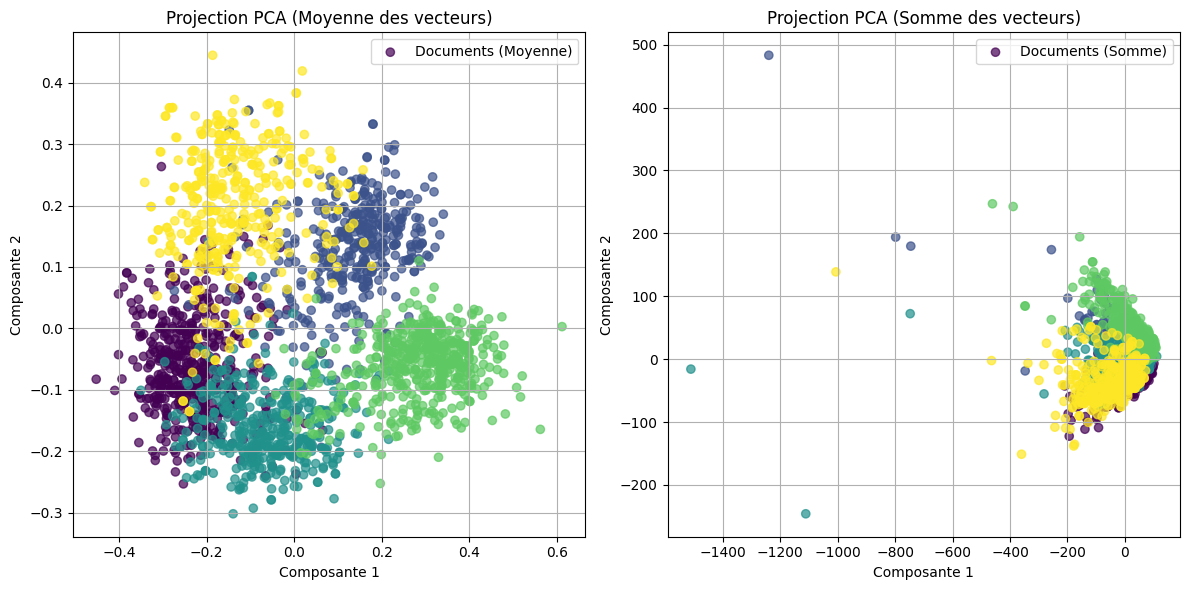

In [88]:
# Réduction de dimension avec PCA
pca = PCA(n_components=2)

# PCA pour les vecteurs moyens
reduced_mean = pca.fit_transform(vectorized_docs_mean)

# PCA pour les vecteurs sommes
reduced_sum = pca.fit_transform(vectorized_docs_sum)

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Sous-graphe pour la moyenne
plt.subplot(1, 2, 1)
plt.scatter(reduced_mean[:, 0], reduced_mean[:, 1], c=df['topic_id'], label='Documents (Moyenne)', alpha=0.7)

plt.title('Projection PCA (Moyenne des vecteurs)')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.grid(True)
plt.legend()

# Sous-graphe pour la somme
plt.subplot(1, 2, 2)
plt.scatter(reduced_sum[:, 0], reduced_sum[:, 1], c=df['topic_id'], label='Documents (Somme)', alpha=0.7)
plt.title('Projection PCA (Somme des vecteurs)')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

La vectorisation de notre corpus en se basant sur la moyenne semble (nettement) donne un meilleur résultat plus qu'en donne celle basée sur la somme.
En effet, la visualisation avec l'ACP, des données issues de la moyenne est beaucoup plus lisible et séparée que celle de la somme.

On y voit par exemple, une intersection des couleurs qui complique la distinction des catégories d'appartenance.

# **Exercice 4 : Clustering de documents avec k-means**

L'objectif de cet exercice est de catégoriser des documents textuels en utilisant l'algorithme de clustering k-means sur la matrice \(X\) des vecteurs de documents. Ensuite, visualisez les résultats en colorant les points dans un graphique 2D selon les clusters obtenus.

- Utilisez l'algorithme k-means pour grouper les documents en 5 clusters (sur les 2 matrices: somme vs. moyenne).
- Réalisez des visualisations 2D de la matrice \(X\) (réduite via ACP).
- Cette fois, coloriez les points en fonction des clusters obtenus par k-means.
- Analysez la répartition des clusters sur le plot.
- Comparez les versions compressées (somme vs moyenne des embeddings) et déterminez laquelle représente le mieux les données originales.
   

**Ressources pour vous aider :**

- Scikit-learn offre une documentation complète sur K-means, avec des exemples, [Lien vers la documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html).


### Exemple : Application de k-means sur des embeddings de documents

Voici un exemple pour utiliser k-means sur une matrice \(X\) et visualiser les résultats :

```python
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exemple de matrice X (remplacez par vos embeddings)
X_somme = ...  # Matrice des embeddings basés sur la somme
X_moyenne = ...  # Matrice des embeddings basés sur la moyenne

# Initialisation et application de k-means.
n_clusters = 5 # Nombre de clusters dans BBC News.
random_state = 2025 # Pour garantir que les résultats sont reproductibles.
n_init = 50 # Nombre d'initialisations.
max_iter = 300 # Nombre max d'itérations.

kmeans_somme = KMeans(
  n_clusters=n_clusters,
  random_state=random_state,
  n_init=n_init,
  max_iter=300).fit(X_somme)

kmeans_moyenne = KMeans(
  n_clusters=n_clusters,
  random_state=random_state,
  n_init=n_init,
  max_iter=300).fit(X_moyenne)

# Réduction de dimension avec ACP.
pca = PCA(n_components=2, random_state=2025)
X_somme_2D = pca.fit_transform(X_somme)
X_moyenne_2D = pca.fit_transform(X_moyenne)

# Visualisation des clusters.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_somme_2D[:, 0], X_somme_2D[:, 1], c=kmeans_somme.labels_, cmap='viridis', s=50)
plt.title("Clustering en utilisant la somme des vecteurs)")
plt.xlabel("ACP 1")
plt.ylabel("ACP 2")
plt.subplot(1, 2, 2)
plt.scatter(X_moyenne_2D[:, 0], X_moyenne_2D[:, 1], c=kmeans_moyenne.labels_, cmap='viridis', s=50)
plt.title("Clustering en utilisant la moyenne des vecteurs)")
plt.xlabel("ACP 1")
plt.ylabel("ACP 2")
plt.tight_layout()
plt.show()
```

In [92]:
from sklearn.cluster import KMeans
# Exemple de matrice X (remplacez par vos embeddings)
X_somme = vectorized_docs_sum  # Matrice des embeddings basés sur la somme
X_moyenne = vectorized_docs_mean  # Matrice des embeddings basés sur la moyenne

# Initialisation et application de k-means.
n_clusters = 5 # Nombre de clusters dans BBC News.
random_state = 2025 # Pour garantir que les résultats sont reproductibles.
n_init = 50 # Nombre d'initialisations.
max_iter = 300 # Nombre max d'itérations.

kmeans_somme = KMeans(
  n_clusters=n_clusters,
  random_state=random_state,
  n_init=n_init,
  max_iter=300).fit(X_somme)

kmeans_moyenne = KMeans(
  n_clusters=n_clusters,
  random_state=random_state,
  n_init=n_init,
  max_iter=300).fit(X_moyenne)

# Réduction de dimension avec ACP.
pca = PCA(n_components=2, random_state=2025)
X_somme_2D = pca.fit_transform(X_somme)
X_moyenne_2D = pca.fit_transform(X_moyenne)


In [95]:
cat1 = kmeans_somme.labels_
cat2 = kmeans_moyenne.labels_

<ipython-input-96-94d9b391dcbc>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


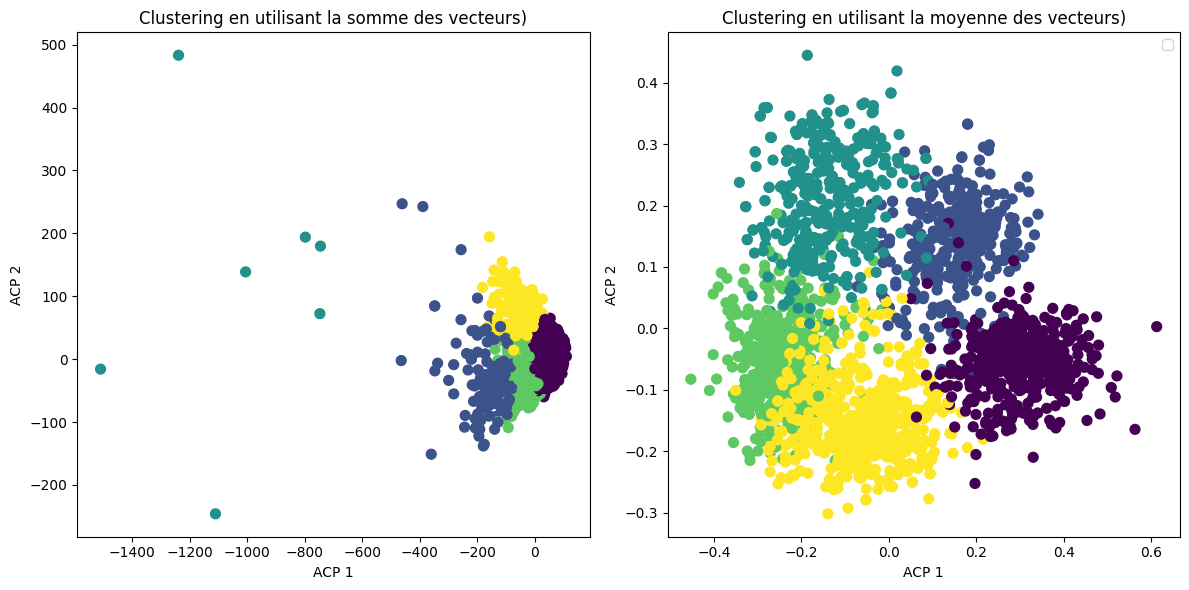

In [96]:
# Visualisation des clusters.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_somme_2D[:, 0], X_somme_2D[:, 1], c=cat1, cmap='viridis', s=50)
plt.title("Clustering en utilisant la somme des vecteurs)")
plt.xlabel("ACP 1")
plt.ylabel("ACP 2")
plt.subplot(1, 2, 2)
plt.scatter(X_moyenne_2D[:, 0], X_moyenne_2D[:, 1], c=cat2, cmap='viridis', s=50)
plt.title("Clustering en utilisant la moyenne des vecteurs)")
plt.xlabel("ACP 1")
plt.ylabel("ACP 2")
plt.legend()

plt.tight_layout()
plt.show()

*1. Répartition des clusters (somme vs moyenne des vecteurs)*


*Graphique de gauche (somme des vecteurs) :*

  La méthode basée sur la somme des vecteurs représente chaque document comme une accumulation des valeurs des mots de son embedding.

  Interprétation :

-Les clusters formés avec la somme des vecteurs sont plus compacts, ce qui indique que cette méthode capture des similarités fortes entre les documents au sein d'un même groupe.

-Cela peut être dû au fait que l'accumulation des valeurs des mots dans un document amplifie les caractéristiques dominantes, rendant les documents d'un même cluster plus proches les uns des autres.

Les points éloignés pourraient signaler une perte d'information lors de l'accumulation des vecteurs, notamment si certains documents ont des proportions inégales de termes dominants.


*Graphique de droite (moyenne des vecteurs) :*

  Ici, chaque document est représenté par une moyenne des vecteurs de ses mots.

Interprétation :

 La séparation nette et la lisibilité des clusters suggèrent que la méthode basée sur la moyenne représente bien les relations entre les documents dans un espace plus équilibré.

En utilisant la moyenne, chaque document est représenté par une position centrale, réduisant l'effet des termes dominants et amplifiant les relations globales.

Les clusters bien séparés et lisibles facilitent l'interprétation des catégories thématiques.

Cette méthode est utile pour capturer les similarités globales entre les documents, même si les thèmes sont plus diversifiés.

# **Exercice 5 : Réduction de dimensions comme étape de prétraitement**

L'objectif de cet exercice est d'utiliser la réduction de dimensions comme une étape de prétraitement pour compresser les données avant de procéder au clustering par k-means. Dans ce cas, le nombre de dimensions peut être supérieur à 2. Comparez ensuite les étiquettes réelles des données avec celles obtenues via k-means, à la fois visuellement et numériquement.

- Appliquez une ACP sur les vecteurs obtenus à l'aide de Word2Vec, en déterminant automatiquement le nombre optimal de dimensions nécessaires pour expliquer 90 % de l'inertie totale des données. Cette approche permet de compresser efficacement les données tout en préservant la majeure partie de l'information.

  En utilisant:
  ```python
    pca = PCA(n_components=0.90)  # Garde les dimensions expliquant 90 % de l'inertie
    X_reduced = pca.fit_transform(X)
  ```

- Utilisez l'algorithme k-means sur les données compressées pour les regrouper en clusters.
- Visualisez les clusters avec ACP.


Nombre de dimensions après réduction : 114
Inertie expliquée totale : 0.90
Adjusted Rand Index (ARI) : 0.75


<ipython-input-99-bb33971c408a>:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


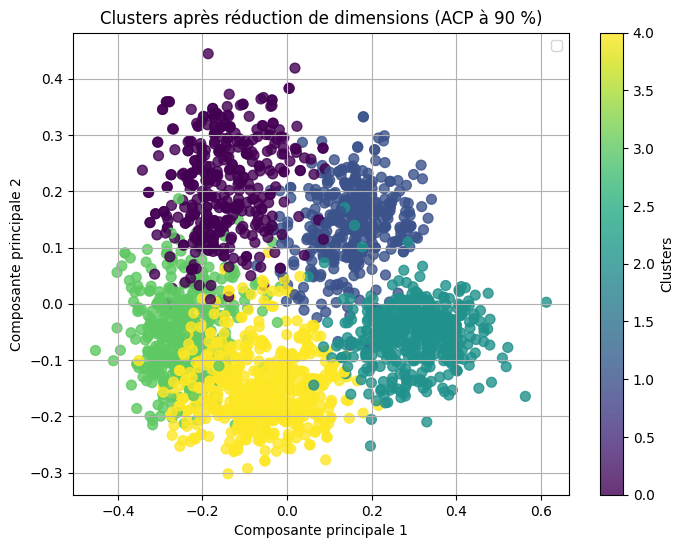

In [99]:
from sklearn.metrics import adjusted_rand_score

# Exemple de données Word2Vec
# Remplacez 'X' par vos embeddings obtenus via Word2Vec
X = vectorized_docs_mean

# Étape 1 : Réduction de dimension avec ACP (90 % de l'inertie)
pca = PCA(n_components=0.90)  # Conserve 90 % de l'inertie
X_reduced = pca.fit_transform(X)

# Afficher les dimensions retenues
print(f"Nombre de dimensions après réduction : {X_reduced.shape[1]}")
print(f"Inertie expliquée totale : {np.sum(pca.explained_variance_ratio_):.2f}")

# Étape 2 : Clustering avec k-means
n_clusters = 5  # Adaptez ce nombre si nécessaire
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=50, max_iter=300)
labels_kmeans = kmeans.fit_predict(X_reduced)

# Si vous avez des étiquettes réelles, comparez-les aux clusters trouvés (exemple : adjusted_rand_score)
labels_real = df['topic_id']  # Exemple de colonne contenant les étiquettes réelles
ari_score = adjusted_rand_score(labels_real, labels_kmeans)
print(f"Adjusted Rand Index (ARI) : {ari_score:.2f}")

# Étape 3 : Visualisation des clusters avec ACP en 2D
pca_2d = PCA(n_components=2)  # Réduction à 2 dimensions pour visualisation
X_2D = pca_2d.fit_transform(X_reduced)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_2D[:, 0], X_2D[:, 1], c=labels_kmeans, cmap="viridis", s=50, alpha=0.8
)
plt.title("Clusters après réduction de dimensions (ACP à 90 %)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(scatter, label="Clusters")
plt.legend()
plt.grid(True)
plt.show()


Nous remarquons que le KMeans, basé sur les données de l'ACP ( après réduction)a amélioré la visualisation.

Nombre de dimensions après réduction : 52
Inertie expliquée totale : 0.90
Adjusted Rand Index (ARI) : 0.12


<ipython-input-100-e56e925aaea0>:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


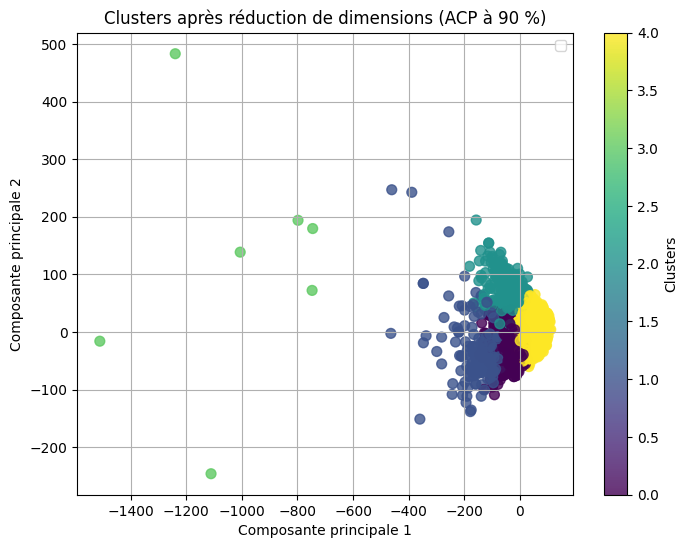

In [100]:
from sklearn.metrics import adjusted_rand_score

# Exemple de données Word2Vec
# Remplacez 'X' par vos embeddings obtenus via Word2Vec
X = vectorized_docs_sum

# Étape 1 : Réduction de dimension avec ACP (90 % de l'inertie)
pca = PCA(n_components=0.90)  # Conserve 90 % de l'inertie
X_reduced = pca.fit_transform(X)

# Afficher les dimensions retenues
print(f"Nombre de dimensions après réduction : {X_reduced.shape[1]}")
print(f"Inertie expliquée totale : {np.sum(pca.explained_variance_ratio_):.2f}")

# Étape 2 : Clustering avec k-means
n_clusters = 5  # Adaptez ce nombre si nécessaire
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=50, max_iter=300)
labels_kmeans = kmeans.fit_predict(X_reduced)

# Si vous avez des étiquettes réelles, comparez-les aux clusters trouvés (exemple : adjusted_rand_score)
labels_real = df['topic_id']  # Exemple de colonne contenant les étiquettes réelles
ari_score = adjusted_rand_score(labels_real, labels_kmeans)
print(f"Adjusted Rand Index (ARI) : {ari_score:.2f}")

# Étape 3 : Visualisation des clusters avec ACP en 2D
pca_2d = PCA(n_components=2)  # Réduction à 2 dimensions pour visualisation
X_2D = pca_2d.fit_transform(X_reduced)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_2D[:, 0], X_2D[:, 1], c=labels_kmeans, cmap="viridis", s=50, alpha=0.8
)
plt.title("Clusters après réduction de dimensions (ACP à 90 %)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(scatter, label="Clusters")
plt.legend()
plt.grid(True)
plt.show()

# **Exercice 6 : Entraînement d'un modèle Word2Vec**

- Tester différents paramètres pour entraîner des modèles Word2Vec, à la fois en mode skip-gram et CBOW.
- Appliquer le modèle Word2Vec entrainé pour calculer la représentation vectorielle des documents dans votre corpus. Cela implique l'agrégation des vecteurs de mots pour chaque document en prenant la moyenne ou la somme.
- Utilisez l'ACP pour réduire la taille de vi-os données.
- Après la réduction de dimension, utilisez l'algorithme K-means pour regrouper les documents.
- Comparez les résultats obtenus en utilisant le modèle pré-entraîné par rapport au modèle entraîné sur les données.

#### **Ressources pour vous aider :**
- Consultez la [documentation Gensim](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#online-training-resuming-training) pour des orientations sur l'entraînement de modèles Word2Vec.

In [ ]:
from gensim.models import Word2Vec
import time


# Démarrer un chronomètre pour mesurer le temps d'entraînement.
start = time.time()

# Créer une instance du modèle Word2Vec.
# - vector_size=100: Chaque mot sera représenté par un vecteur de 100 dimensions.
# - window=6: Fenêtre contextuelle de 6 mots de chaque côté du mot cible.
# - min_count=2: Les mots doivent apparaître au moins 2 fois pour être considérés.
# - sg=1: Utiliser l'architecture skip-gram (sg=0 pour CBOW).
# - hs=0: Ne pas utiliser de softmax hiérarchique pour l'entraînement.
# - negative=5: Utiliser l'échantillonnage négatif avec 5 mots "négatifs".
my_w2v_model = Word2Vec(vector_size=100,
                        window=6,
                        min_count=2,
                        sg=1,
                        hs=0,
                        negative=5)

# Construire le vocabulaire à partir du corpus.
# corpus: Le corpus sur lequel entraîner le modèle.
corpus = vectorized_docs_mean
my_w2v_model.build_vocab(corpus_iterable=corpus)

# Entraîner le modèle sur le corpus.
# total_examples=len(wiki_corpus): Le nombre total de phrases dans le corpus.
# epochs=10: Nombre de passages à travers le corpus pour l'entraînement.
my_w2v_model.train(corpus_iterable=corpus,
                   total_examples=len(corpus),
                   epochs=10)

# Calculer et afficher le temps total pris pour l'entraînement.
end = time.time()
print("Le temps d'entraînement a été de : {} secondes".format(round(end - start, 2)))

Exception in thread Thread-12 (_worker_loop)Exception in thread Thread-13 (_worker_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
:
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-11 (_worker_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/gensim/models/word2vec.py", line 1166, in _worker_loop
        self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/gensim/models/word2vec.py", line 1166, in _worker_loop
self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    tally, r

In [ ]:
# A vous de jouer

Un modèle Word2Vec entraîné n'est pas un simple objet `KeyedVectors`, mais un modèle complet.  
Pour récupérer le vecteur associé à un mot spécifique, il faut utiliser l'attribut `wv`, par exemple :

```python
vector_mot = my_w2v_model.wv['mot']
```